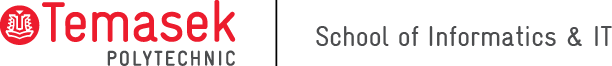
## <center>  Machine Learning for Decision Making (CDA2C05)</center>
### <center>  Practical 4 : Too Good To be True </center>

### <font color=blue> Gentle Instructions: </font>
- The empty code cells are for you to experiment your codes. Feel free to add more cells.
- Replace <font color="Purple"><b> ? </font></b> with correct syntax and use short cut key <i> Shift + Enter </i> to execute your cells.
- Double click on markdown cells to enter your remarks, observations, best practices, etc. Execute your markdown cells to view them properly. 

## 1. Target Leakages
Target leakage is a common issue in machine learning that occur when you train your model on information that would NOT be available when you use the model during production to score the newly collected data. Taking target leakage(s) as your inputs to the machine learning model will give rise to overly optimistic performance estimates. 

Target leakage can also occur when the features used for training the model are derived from the target variable.

In DSES we asked ourselves these questions to check:
- ‘Chick & Egg’ problem- is the info avail before making the prediction?
- ‘Like father like son’ problem- are you using raw attributes to predict derived attributes?
- ‘Give away’ problem- are you including attribute that doesn’t even need other attributes to make prediction? 


<div class="alert alert-block alert-info">
<b>We will run through four basic computational methods of detecting POSSIBLE target leakages. <br> 
    <i>Note: To confirm whether an attribute still requires domain knowledge- </b></i>
    
    Is this information available during scoring? Already remove them before running through the computational methods. 
</div>

<div class="alert alert-block alert-warning">
<b>We will use an updated dataset on laptop prices. "Price_euros" is still your target. There are of course target leakages present in the dataset, can you find them out? Let's start! </b>
    
    Please download a new dataset from LMS.
</div>

### Getting everything ready first

In [1]:
#load all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score , mean_absolute_percentage_error
from sklearn import tree

randomstate=123456

In [2]:
#load the dataset as df and perform basic EDA
df = pd.read_excel("Laptop Prices 2.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1080 non-null   int64  
 1   Company           1080 non-null   object 
 2   Product           1080 non-null   object 
 3   Column2           1080 non-null   float64
 4   Column3           1080 non-null   float64
 5   TypeName          1080 non-null   object 
 6   Inches            1080 non-null   float64
 7   ScreenResolution  1080 non-null   object 
 8   Ram (GB)          1080 non-null   int64  
 9   Memory            1080 non-null   object 
 10  GPU1              1080 non-null   object 
 11  GPU2              1080 non-null   object 
 12  GPU3              41 non-null     object 
 13  OpSys             1080 non-null   object 
 14  Weight (Kg)       1080 non-null   float64
 15  CPU               1080 non-null   object 
 16  CPU2              1080 non-null   object 


In [4]:
df.head()

,ID,Company,Product,Column2,Column3,TypeName,Inches,ScreenResolution,Ram (GB),Memory,...,GPU3,OpSys,Weight (Kg),CPU,CPU2,CPU3,CPU4,CPU5,Price_euros,Extend Warranty
0,6,Acer,Aspire 3,20.000,380.000,Notebook,15.6,1366x768,4,500GB HDD,...,R5,Windows 10,2.1,AMD,A9-Series,9420,3GHz,,400.0,0
1,9,Asus,ZenBook UX430UN,149.500,1345.500,Ultrabook,14.0,Full HD 1920x1080,16,512GB SSD,...,MX150,Windows 10,1.3,Intel,Core,i7,8550U,1.8GHz,1495.0,1
2,10,Acer,Swift 3,77.000,693.000,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8,256GB SSD,...,Graphics 620,Windows 10,1.6,Intel,Core,i5,8250U,1.6GHz,770.0,1
3,14,Dell,Inspiron 3567,24.945,473.955,Notebook,15.6,Full HD 1920x1080,4,256GB SSD,...,R5 M430,Windows 10,2.2,Intel,Core,i3,6006U,2GHz,498.9,0
4,17,Dell,Inspiron 3567,74.500,670.500,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,...,R5 M430,Windows 10,2.2,Intel,Core,i7,7500U,2.7GHz,745.0,0


<div class="alert alert-block alert-info">
<b>What is different?
</div>

Your observations:
1. what is column 2 and 3
2. The CPU names are split based on space
3. The GPU names are split based on space
4. CPU columns and GPU columns should be joined together before encoding

### 1.1 Correlation 
Correlation analysis can be used to identify such leakages by measuring the strength of the relationship between each feature (attribute) and the target. If the strength is very strong, it may be a flag for target leakage.  

But we have also learned that Pearson's correlation analysis can only be applied on a pair of numerical attributes, in this case a regression task (numerical target). 

> What about detecting nominal and ordinal features as leakages?
> How about classification task?

### Checklist for Regression
- Find out which are the numerical attributes, which are the categorical ones.
- Obtain Pearson's correlation coefficients between numerical attributes and the target.
- Identify the attributes with strong to very strong positive coefficients.
- Check using domain knowledge whether they are available before future scoring, or are they derived from target variable.
- For categorical ones, apply other correlation analysis or statistical testing.    
</div>

<div class="alert alert-block alert-info">
<b>Discuss with your peers what are some other correlation analyses or statistical methods that can be used for such categorical data.</b>    
    
    Ordinal-Ratio? Nominal-Ratio? 
</div>

Your take-aways:
1. Nominal cannot use pearsons
2. Pearson only for numerical categoricals

#### 1.1.1 Pearson's Correlation

In [5]:
corr_mat=df.corr()
corr_mat.style.background_gradient(cmap='Blues')

,ID,Column2,Column3,Inches,Ram (GB),Weight (Kg),Price_euros,Extend Warranty
ID,1.000000,0.064098,0.065437,-0.077988,-0.006830,-0.003543,0.065330,0.015760
Column2,0.064098,1.000000,0.994293,0.075095,0.748237,0.232884,0.995436,0.691706
Column3,0.065437,0.994293,1.000000,0.083419,0.752245,0.244033,0.999936,0.658635
Inches,-0.077988,0.075095,0.083419,1.000000,0.249754,0.824515,0.082581,-0.024285
Ram (GB),-0.006830,0.748237,0.752245,0.249754,1.000000,0.403065,0.752227,0.494694
Weight (Kg),-0.003543,0.232884,0.244033,0.824515,0.403065,1.000000,0.242982,0.058146
Price_euros,0.065330,0.995436,0.999936,0.082581,0.752227,0.242982,1.000000,0.662498
Extend Warranty,0.015760,0.691706,0.658635,-0.024285,0.494694,0.058146,0.662498,1.000000


<div class="alert alert-block alert-info">
<b>What do you observe?
</div>

Your observations:
1. Column 2 and 3 have very strong correlarion with many columns
2. Ram is good predictor for euros

#### 1.1.2 ?? Correlation
Your turn now to try out other statistical methods.

In [6]:
import scipy.stats as stats
from scipy.stats import chi2_contingency, f_oneway
import itertools
from itertools import chain

df_obj = df.select_dtypes(include=[object])
target = df['Price_euros']
new_df = pd.concat([df_obj, target], axis=1)

In [7]:
for col in new_df.columns:
    groups = []
    
    # for current col, check its relationship with target
    for category, group_df in new_df.groupby(col):
        groups.append(group_df['Price_euros'])
        
    # extracting p value from oneway ANOVA by passing all categorical columns
    f_value, p_value = f_oneway(*groups)
    print(f"ANOVA FOR {col}: p-value = {p_value: .12f}")

ANOVA FOR Company: p-value =  0.000000000000
ANOVA FOR Product: p-value =  0.000000000000
ANOVA FOR TypeName: p-value =  0.000000000000
ANOVA FOR ScreenResolution: p-value =  0.000000000000
ANOVA FOR Memory: p-value =  0.000000000000
ANOVA FOR GPU1: p-value =  0.000000000000
ANOVA FOR GPU2: p-value =  0.000000000000
ANOVA FOR GPU3: p-value =  0.004789006106
ANOVA FOR OpSys: p-value =  0.632307742694
ANOVA FOR CPU: p-value =  0.000000000004
ANOVA FOR CPU2: p-value =  0.000000000000
ANOVA FOR CPU3: p-value =  0.000000000000
ANOVA FOR CPU4: p-value =  0.000000000000
ANOVA FOR CPU5: p-value =  0.000000000000
ANOVA FOR Price_euros: p-value =  0.000000000000


C:\Users\javen\anaconda3\lib\site-packages\scipy\stats\stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


<div class="alert alert-block alert-info">
<b>Is there any signification association between the categorical attributes with the target? 
</div>

Your observations:
1.  Null hypothesis is features are not significantly related to target. all column will p value below 0.05 are potential features as null hypothesis is rejected. This means these columns are useful as features as they are statistically significant to target.
2. OpsSys is not significantly related to target and should not be considered as a predictor.

<div class="alert alert-block alert-info">
<b>Modify the following checklist for Classification task
</div>

### Checklist for Classification
- Find out which are the numerical attributes, which are the categorical ones.
- Perform correlation test between numerical attributes and the <b><font color='red'> categorical </b> target.
- Identify the attributes with significant (low) p-values.
- Check using domain knowledge whether they are available before future scoring, or are they derived from target variable.
- For categorical ones, apply encoding.    
</div>

<div class="alert alert-block alert-warning">
<b>Your tutor may request to apply the above on a new df- the Boston Housing Price
</div>

### 1.2 Feature Importance
There are two main methods to calculate feature importances. If a feature (attribute) is ranked very highly, it means that this feature is very impactful to the model outcome (prediction). 
- <b>Method 1</b>: Tree-based feature importance. Based on how much each feature reduces the impurity of the decision tree. Features that reduce impurity the most are considered to be more important. <br>
i. Low impurity means the decision at the node leads to more samples of a particular class (for classification) or lower e.g. MSE (for regression)
- <b>Method 2</b>: Permutation importance. 

<div class="alert alert-block alert-info">
<b>Discuss with your peers the pros and cons of these two methods</b>    
    
</div>

Your take-aways:
1. Feature importance is good for understanding which feature affects prediction.
2. Permutation of which feature gets evaluated first is also importance as a meaningful split at the start would mean lesser work further down. 

#### 1.2.1 Tree-based Feature Importance
We need to build tree-based model before we can calculate the feature importances for these input features. 

<div class="alert alert-block alert-warning">
<b>Still working on the same df- Laptop Prices 2. </b>
    
    Build a DTR
</div>

In [8]:
#Create two different dfs- one that contain purely categorical data, the other only numerical data
df1 = pd.read_csv('BostonHousingPrice.csv')
df1['CHAS'] = df1['CHAS'].astype(str)
df1['TARGET'] = df1['TARGET'].astype(str)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S/N      506 non-null    int64  
 1   CRIM     506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    object 
 5   NOX      506 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        506 non-null    float64
 13  LSTAT    506 non-null    float64
 14  MEDV     506 non-null    float64
 15  TARGET   506 non-null    object 
dtypes: float64(11), int64(3), object(2)
memory usage: 63.4+ KB


In [9]:
#Perform features encoding
X = df1.drop('TARGET', axis=1)
y = df1['TARGET']
df_num = X.select_dtypes(exclude='object').columns.tolist()
chi_dict = {}

for col in df_num:
    obs = pd.crosstab(X[col], y)
    chi, p, dof, expected = stats.chi2_contingency(obs)
    chi_dict[col] = p # insert the col as col name and p as value
    
for key, value in chi_dict.items():
    print(key, ':', value)

S/N : 0.479096677584102
CRIM : 0.4818429523735237
ZN : 5.4956330341571345e-05
INDUS : 4.2544927702978824e-16
NOX : 3.017328014699394e-27
RM : 0.39055572455116905
AGE : 0.08861941090757953
DIS : 0.009245141809220713
RAD : 4.30431158914966e-20
TAX : 6.698551476013831e-15
PTRATIO : 5.358435416112057e-19
B : 0.22452096863217313
LSTAT : 0.37446541442710213
MEDV : 3.820629965446739e-23


In [10]:
#Set target and inputs
df_obj = df.select_dtypes(include=[object])
df_num = df.select_dtypes(exclude=[object]).drop(columns=['Price_euros', 'ID'])

In [11]:
#Data encode
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)
df_obj = df_obj.apply(lambda x: d[x.name].fit_transform(x.astype(str)))

In [12]:
# Data partition
df2 = pd.concat([df_obj, df_num], axis=1)
X = df2
y = df['Price_euros']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   shuffle = True, random_state = randomstate)

In [13]:
#Build DTR model
from sklearn.tree import DecisionTreeRegressor as DTR
my_dtr = DTR(random_state = randomstate).fit(X_train, y_train)

In [14]:
feats = {}
for feature, importance in zip(X.columns, my_dtr.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
top15import = importances.sort_values(by='Importance',ascending=False).head(15)
print(top15import)

                    Importance
Column3           8.429962e-01
Column2           1.569681e-01
Memory            8.714902e-06
CPU4              8.683437e-06
ScreenResolution  5.871312e-06
Inches            3.048239e-06
Ram (GB)          2.177107e-06
Weight (Kg)       2.050149e-06
Product           1.753236e-06
CPU5              1.364105e-06
GPU2              8.341165e-07
Company           7.573711e-07
TypeName          3.580726e-07
CPU3              6.838991e-08
GPU1              5.367772e-08


<div class="alert alert-block alert-info">
<b>What do you observe?
</div>

Your observations:
1. high importance columns are potential target leakages
2. high importance means strong relationship with target

<div class="alert alert-block alert-info">
<b>Try out PI calculation on your own.</b>   
    
    Do you have the same insights?
    
</div>

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=randomstate)

# Build the Decision Tree Regressor (DTR) model
my_dtr = DecisionTreeRegressor(random_state=randomstate).fit(X_train, y_train)

# Calculate permutation importances
perm_importances = permutation_importance(my_dtr, X_test, y_test, n_repeats=30, random_state=randomstate)

# Get the feature importances
importances = pd.DataFrame({'Feature': X.columns, 'Importance': perm_importances.importances_mean})

# Sort and display the top 15 most important features
top15import = importances.sort_values(by='Importance', ascending=False).head(15)
print(top15import)

             Feature    Importance
15           Column3  9.871282e-01
14           Column2  4.881709e-01
17          Ram (GB)  1.559224e-05
0            Company  4.475744e-06
16            Inches  1.758249e-06
12              CPU4  1.056795e-06
3   ScreenResolution  9.484438e-07
13              CPU5  7.745752e-07
18       Weight (Kg)  4.485456e-07
2           TypeName  2.979027e-07
10              CPU2  0.000000e+00
9                CPU  0.000000e+00
8              OpSys  0.000000e+00
7               GPU3  0.000000e+00
19   Extend Warranty  0.000000e+00


<div class="alert alert-block alert-warning">
<b>Note that we will use FI to help us in Features Engineering and making the model more lightweight in the later Practicals. </b>

</div>

### 1.3 Visualisation

In [16]:
#Visualise the dtr
text_representation = tree.export_text(my_dtr,feature_names=list(X_train.columns), max_depth=5)
print(text_representation)

|--- Column3 <= 1308.55
|   |--- Column2 <= 84.25
|   |   |--- Column2 <= 27.33
|   |   |   |--- Column2 <= 19.08
|   |   |   |   |--- Column3 <= 274.55
|   |   |   |   |   |--- Column3 <= 222.30
|   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |--- Column3 >  222.30
|   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |--- Column3 >  274.55
|   |   |   |   |   |--- Column3 <= 319.20
|   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |--- Column3 >  319.20
|   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- Column2 >  19.08
|   |   |   |   |--- Column3 <= 439.38
|   |   |   |   |   |--- Column3 <= 401.38
|   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |--- Column3 >  401.38
|   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |--- Column3 >  439.38
|   |   |   |   |   |--- Column2 <= 25.75
|   |   |   |   |   |   |--- truncated branch of depth

<div class="alert alert-block alert-info">
<b>What do you observe?
</div>

Your observations:
1. for most branches, column 3 is the first split. This makes it highly overfitted hence its highly suspected target leakage.
2. This means the col 3 is likely derived from target.

### 1.4 Metrics Performance

In [17]:
#make predictions
y_pred_dtr_train=my_dtr.predict(X_train)
y_pred_dtr_test=my_dtr.predict(X_test)

In [18]:
print("*****Training Set*****")
print("MSE: %.2f" % mean_squared_error(y_train, y_pred_dtr_train))
print("R2: %.2f" % r2_score(y_train, y_pred_dtr_train))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_train, y_pred_dtr_train))
print("MAE: %.2f" % mean_absolute_error(y_train, y_pred_dtr_train))
print("*****Validation Set*****")
print("MSE: %.2f" % mean_squared_error(y_test, y_pred_dtr_test))
print("R2: %.2f" % r2_score(y_test, y_pred_dtr_test))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred_dtr_test))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred_dtr_test))

*****Training Set*****
MSE: 0.00
R2: 1.00
MAPE: 0.00
MAE: 0.00
*****Validation Set*****
MSE: 25.60
R2: 1.00
MAPE: 0.00
MAE: 2.53


<div class="alert alert-block alert-info">
<b>What do you observe?
</div>

Your observations:
1. Overfitted model as R2 is perfect score.
2. There is 0 error for training set.

## 2. Summary
We have successfully performed the following:
- understand what is target leakage
- list the ways to detect target leakage
- apply four different methods to detect target leakge. 

### <center>Remember to save your work <center>